In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from IPython.display import Image
from IPython.core.display import HTML
from tqdm import tqdm

# 11.Approximating Contours and Convex Hull
- cv2.approxPolyDP(contour, Approximation Accuracy, Closed)


# 다각형 근사 

- cv2.findContours() 함수에 의해서 찾은 contours line은 각각의
- contours point를 가지고 있습니다. 이 Point를 연결하여 Line을 그리게 됩니다.
- 이때 이 point의 수를 줄여 근사한 line을 그릴 때 사용되는 방법입니다

In [29]:
img = cv2.imread('./data/bad_rect.png')

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 241.26it/s]


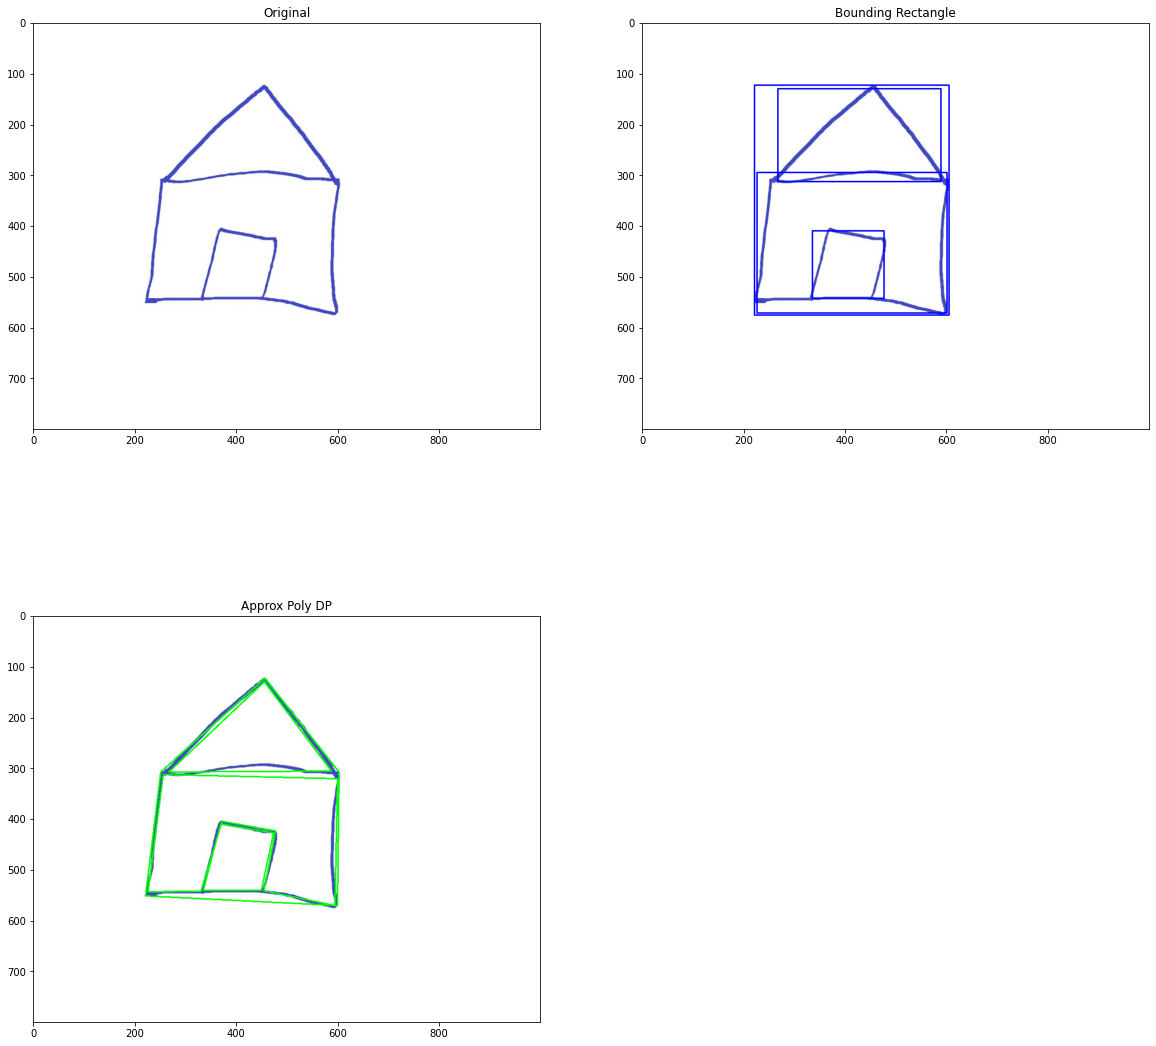

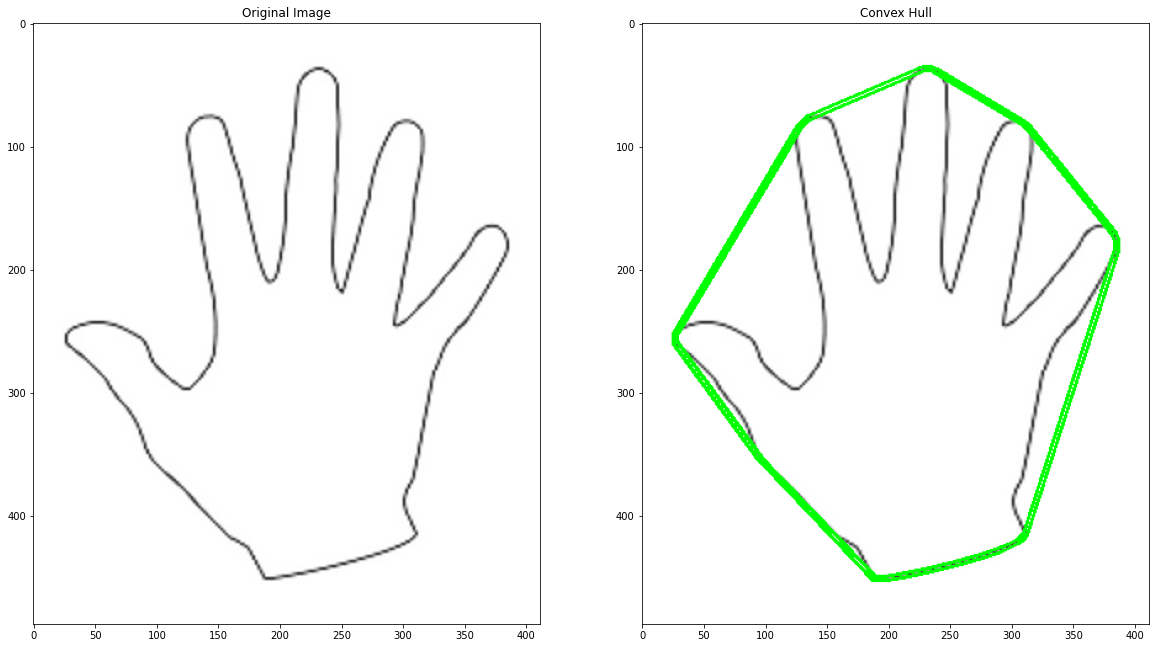

In [3]:
# Load image and keep a copy
image = cv2.imread('./data/house.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)

orig_image = image.copy()

# Grayscale and binarize
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours 
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Iterate through each contour and compute the bounding rectangle
for c in (contours):
    #cv2.boundingRect(c) --> 컨투어를 둘러싸는 박스
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),2)    
    plt.subplot(2, 2, 2)
    plt.title("Bounding Rectangle")
    plt.imshow(orig_image)


# Iterate through each contour and compute the approx contour
for c in (contours):
    # cv.arcLength()
    # 외곽선 길이를 반환합니다
    accuracy = 0.03 * cv2.arcLength(c, True)
    # accuracy -> 기존 곡선과 근사화된 곡선 까지의 최대 거리 지정
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)
    
    plt.subplot(2, 2, 3)
    plt.title("Approx Poly DP")
    plt.imshow(image)

plt.show()
    
# Convex Hull
image = cv2.imread('./data/hand.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

# Threshold the image
ret, thresh = cv2.threshold(gray, 176, 255, 0)

# Find contours 
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
# Sort Contors by area and then remove the largest frame contour
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# Convex Hull -> 볼록한 도형
# 오목한 곳을 다 없에 준다
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(image, [hull], 0, (0, 255, 0), 2)

    plt.subplot(1, 2, 2)
    plt.title("Convex Hull")
    plt.imshow(image)


# 12.Identifiy Contours by Shape

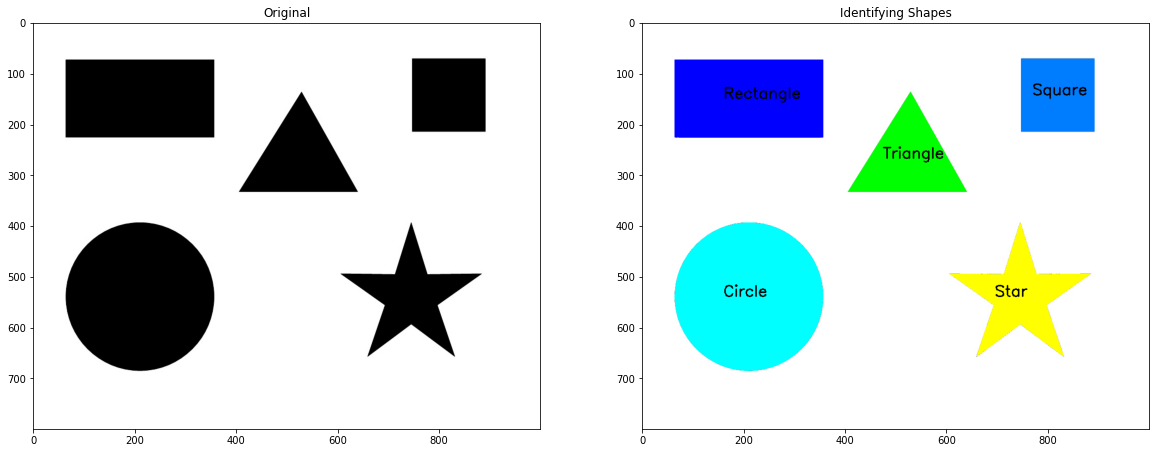

In [26]:
image = cv2.imread('./data/someshapes.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)
ret, thresh = cv2.threshold(gray, 127, 255, 1)

# Extract Contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for cnt in contours:
    # Get approximate polygons
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt,True),True)
    
    if len(approx) == 3:
        shape_name = "Triangle"
        cv2.drawContours(image,[cnt],0,(0,255,0),-1)
        
        # cv2.moments : 무게 중심 찾는 방법
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        # 이미지, 출력문자, 출력 문자 시작 위치, font, 폰트 크기, 폰트 색상, 폰트 두께
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
    
    elif len(approx) == 4:
        x,y,w,h = cv2.boundingRect(cnt)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        
        # Check to see if 4-side polygon is square or rectangle
        # cv2.boundingRect returns the top left and then width and 
        if abs(w-h) <= 3:
            shape_name = "Square"
            
            # Find contour center to place text at the center
            cv2.drawContours(image, [cnt], 0, (0, 125 ,255), -1)
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
        else:
            shape_name = "Rectangle"
            
            # Find contour center to place text at the center
            cv2.drawContours(image, [cnt], 0, (0, 0, 255), -1)
            M = cv2.moments(cnt)
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
            
    elif len(approx) == 10:
        shape_name = "Star"
        cv2.drawContours(image, [cnt], 0, (255, 255, 0), -1)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
        
        
        
    elif len(approx) >= 15:
        shape_name = "Circle"
        cv2.drawContours(image, [cnt], 0, (0, 255, 255), -1)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

plt.subplot(2, 2, 2)
plt.title("Identifying Shapes")
plt.imshow(image)

# 13.Line Detection - Using Hough Lines

- 허프 변환
- 이미지의 모양을 찾는 유명한 방법
- y = mx+c --> r = xcos$\theta$ + ysin$\theta$

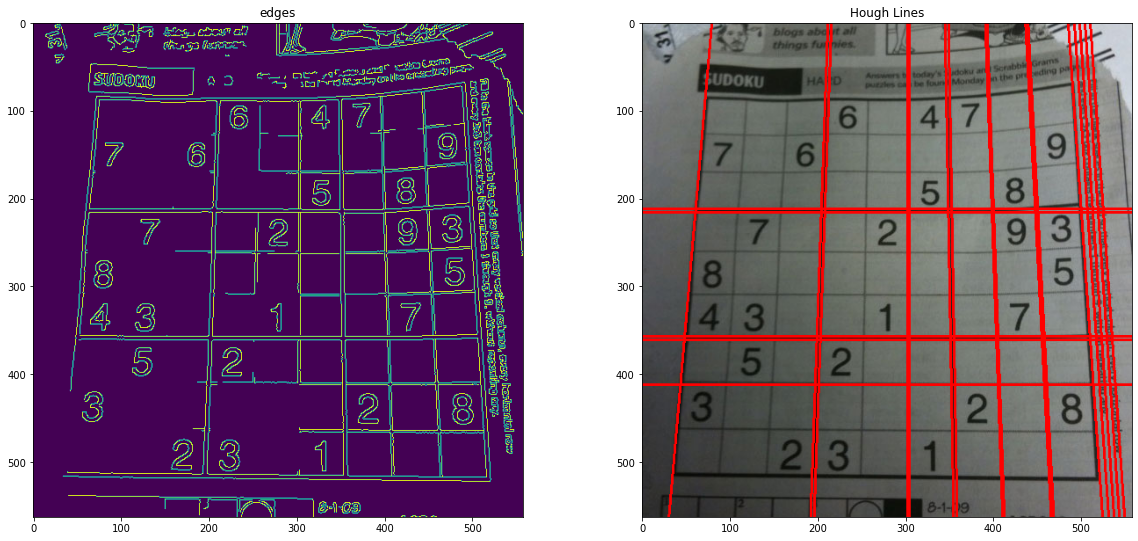

In [44]:
image = cv2.imread('./data/sudoku.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

# Grayscale and Canny Edges extracted
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

plt.subplot(2, 2, 1)
plt.title("edges")
plt.imshow(edges)

# Run HoughLines using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# Our line threshold is set to 240 (number of points on line)

# image, rho :r 의 범위, np.pi/180 -> theta의 범위, threshold -> 만나는 점의 기준
# threshhold > 숫자가 적으면 선은 검출이 많이 되지만 정확도 떨어짐

lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# We iterate through each line and convert it to the format
# required by cv.lines (i.e. requiring end points)
for line in lines: #  검출된 모든 선 순회
    rho, theta = line[0] # 거리와 각도
    a = np.cos(theta) # x, y축에 대한 삼각비
    b = np.sin(theta) # x, y축에 대한 삼각비
    x0 = a * rho  #x, y 기준(절편) 좌표
    y0 = b * rho  #x, y 기준(절편) 좌표
    x1 = int(x0 + 1000 * (-b))  # 직선 방정식으로 그리기 위한 시작점, 끝점 계산
    y1 = int(y0 + 1000 * (a))  # 직선 방정식으로 그리기 위한 시작점, 끝점 계산
    x2 = int(x0 - 1000 * (-b))  # 직선 방정식으로 그리기 위한 시작점, 끝점 계산
    y2 = int(y0 - 1000 * (a))  # 직선 방정식으로 그리기 위한 시작점, 끝점 계산
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.subplot(2, 2, 2)
plt.title("Hough Lines")
plt.imshow(image)

# 14.Counting Circles and Ellipses

- cv2.SimpleBlobDetector_create : 이미지 특징점 곰출
- 영어로 keypoints : 특정점이 되는 부분은 물체의 모서리나 코너
- SimpleBlobDetector_create : 자잘한 객체는 노이즈로 여기고 특정 크기 이상의 큰 개체만 찾아냄

> 알아보면 좋을 것 들
- FAST(Feature from Accelerated Segment Test)
- GFTTDetector
- Shi & Tomasi Detection
- Harris Corner Detection

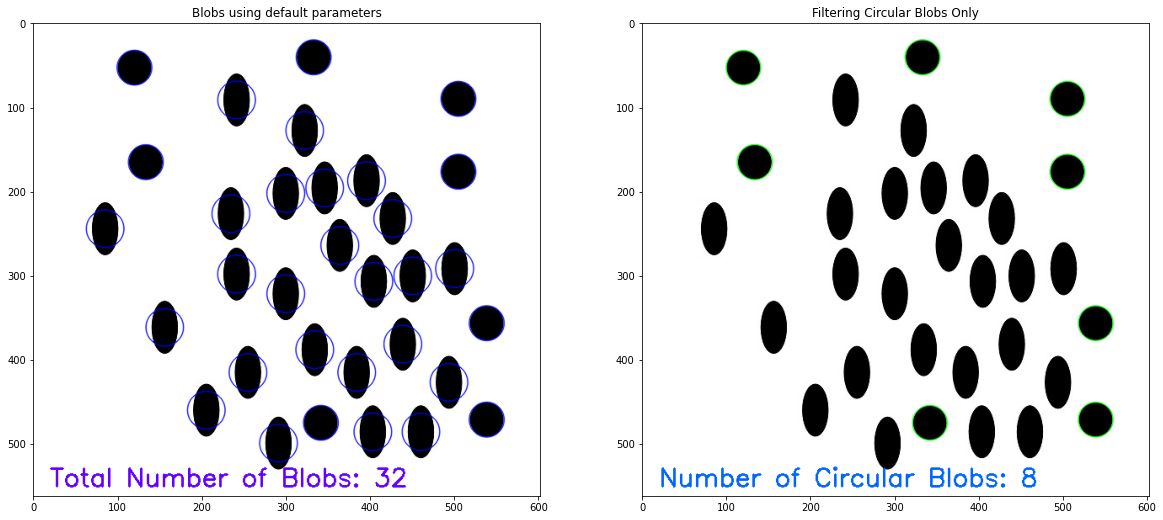

In [46]:
image = cv2.imread('./data/blobs.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

# Intialize the detector using the default parameters
detector = cv2.SimpleBlobDetector_create()
 
# Detect blobs
keypoints = detector.detect(image)
 
# Draw blobs on our image as red circles
blank = np.zeros((1,1)) 

# cv2.drawKeypoints(image, keypoints, outImage, color=None, flags=None) -> outImage
# 입력영산, 검출된 특징점, 출력영상, 특징점 표현 색상, 특징점 표현 방법 : 특징점의 크기와 방향을 반영한 원 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,0,255),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Total Number of Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 255), 2)

# Display image with blob keypoints
plt.subplot(2, 2, 1)
plt.title("Blobs using default parameters")
plt.imshow(blobs)


# Set our filtering parameters
# Initialize parameter settiing using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()

# Set Area filtering parameters
params.filterByArea = True
params.minArea = 100

# Set Circularity filtering parameters
params.filterByCircularity = True 
params.minCircularity = 0.9

# Set Convexity filtering parameters
params.filterByConvexity = False
params.minConvexity = 0.2
    
# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)
    
# Detect blobs
keypoints = detector.detect(image)

# Draw blobs on our image as red circles
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
plt.subplot(2, 2, 2)
plt.title("Filtering Circular Blobs Only")
plt.imshow(blobs)


- cv2.SimpleBlobDetector_Params()
- minThreshold, maxThreshold, thresholdStep: BLOB를 생성하기 위한 경계 값
- (minThreshold에서 maxThreshold를 넘지 않을 때까지 thresholdStep만큼 증가)
- minRepeatability: BLOB에 참여하기 위한 연속된 경계 값의 개수
- minDistBetweenBlobs: 두 BLOB을 하나의 BLOB으로 간주하는 거리
- filterByArea: 면적 필터 옵션
- minArea, maxArea: min~max 범위의 면적만 BLOB으로 검출
- filterByCircularity: 원형 비율 필터 옵션
- minCircularity, maxCircularity: min~max 범위의 원형 비율만 BLOB으로 검출
- filterByColor: 밝기를 이용한 필터 옵션
- blobColor: 0 = 검은색 BLOB 검출, 255 = 흰색 BLOB 검출
- filterByConvexity: 볼록 비율 필터 옵션
- minConvexity, maxConvexity: min~max 범위의 볼록 비율만 BLOB으로 검출
- filterByInertia: 관성 비율 필터 옵션
- minInertiaRatio, maxInertiaRatio: min~max 범위의 관성 비율만 BLOB으로 검출

# 15.Finding Corners

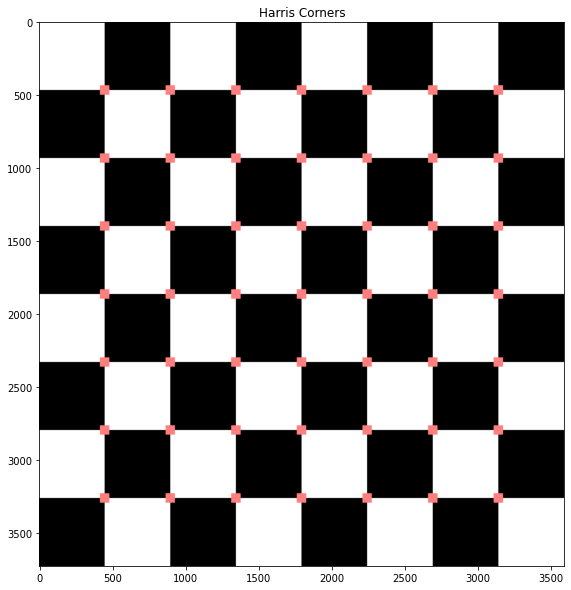

In [49]:
image = cv2.imread('./data/chessboard.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# The cornerHarris function requires the array datatype to be float32
gray = np.float32(gray)

# cv2.cornerHarris --> 코너 검출 (귀퉁이 지점 검출 알고리즘)
# img - 입력 이미지이고, 흑백스케일이고 float32 형태이어야한다
# blockSize - 모서리 탐지를 위한 고려될 이웃 픽셀의 크기를 말한다
# ksize - Sobel 미분에 사용될 인자k 
# 검출식에서 k
harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

#We use dilation of the corner points to enlarge them\
kernel = np.ones((7,7),np.uint8)

# cv2.dilate 
# 이미지 팽창 
# kernel : dilate 하기 위한 커널
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 10)

# Threshold for an optimal value, it may vary depending on the image.
image[harris_corners > 0.025 * harris_corners.max() ] = [255, 127, 127]

plt.subplot(1, 1, 1)
plt.title("Harris Corners")
plt.imshow(image)


# 16.Finding Waldo

In [57]:
image = cv2.imread('./data/waldo.jpeg')


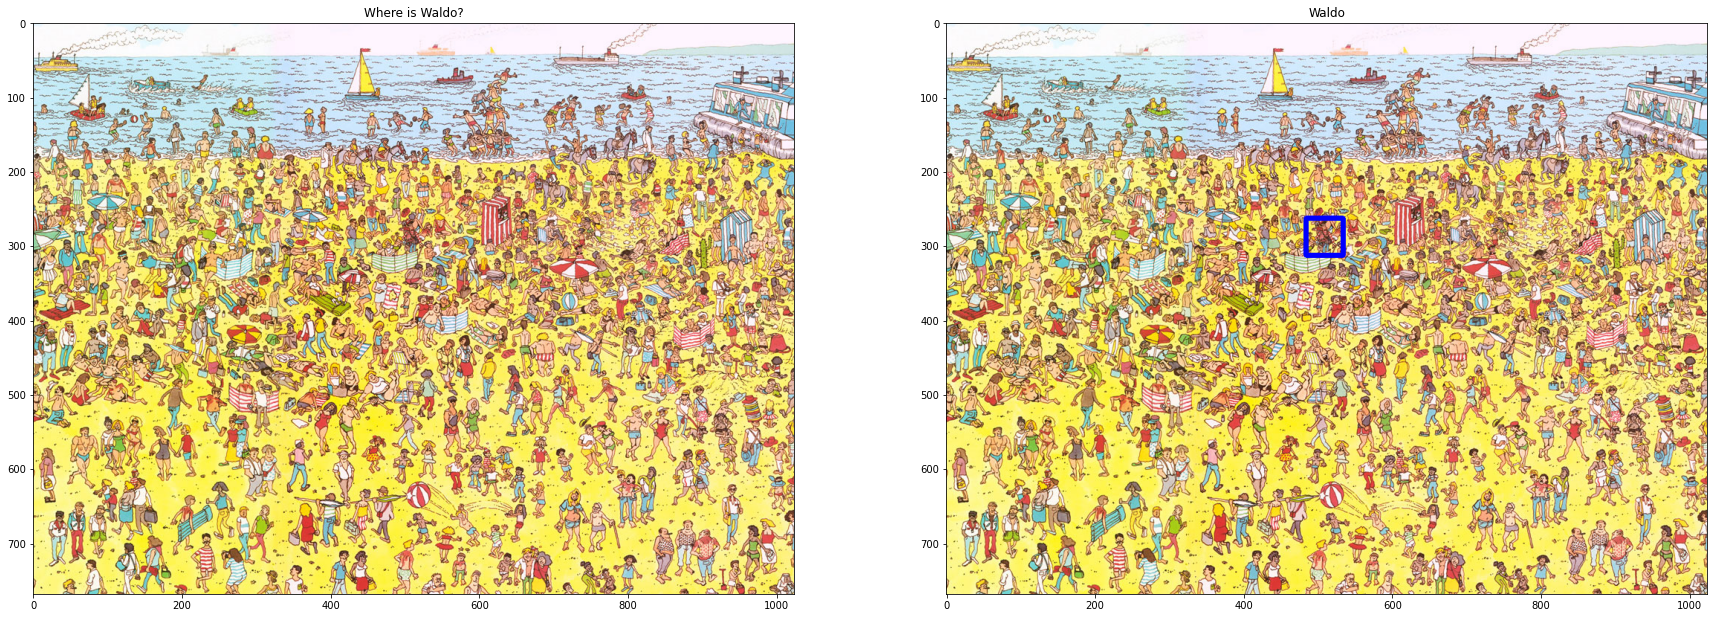

In [60]:
# Load input image and convert to grayscale
image = cv2.imread('./data/WaldoBeach.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30, 30))

plt.subplot(2, 2, 1)
plt.title("Where is Waldo?")
plt.imshow(image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load Template image
template = cv2.imread('./data/waldo.jpeg',0)

result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

#Create Bounding Box
top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
cv2.rectangle(image, top_left, bottom_right, (0,0,255), 5)

plt.subplot(2, 2, 2)
plt.title("Waldo")
plt.imshow(image)


# 17.Background Subtraction Methods

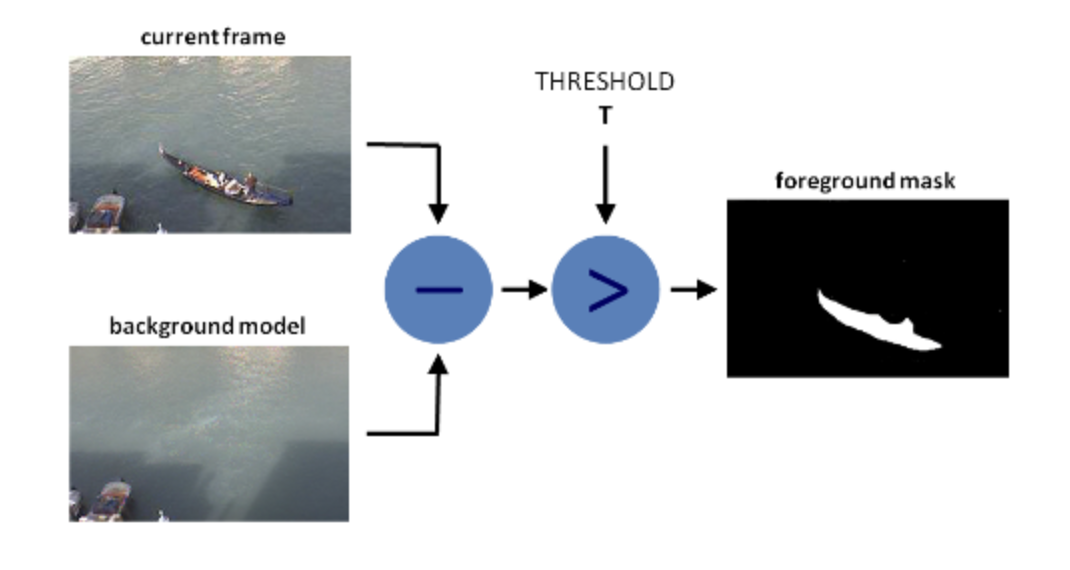

In [61]:
Image('background.png')

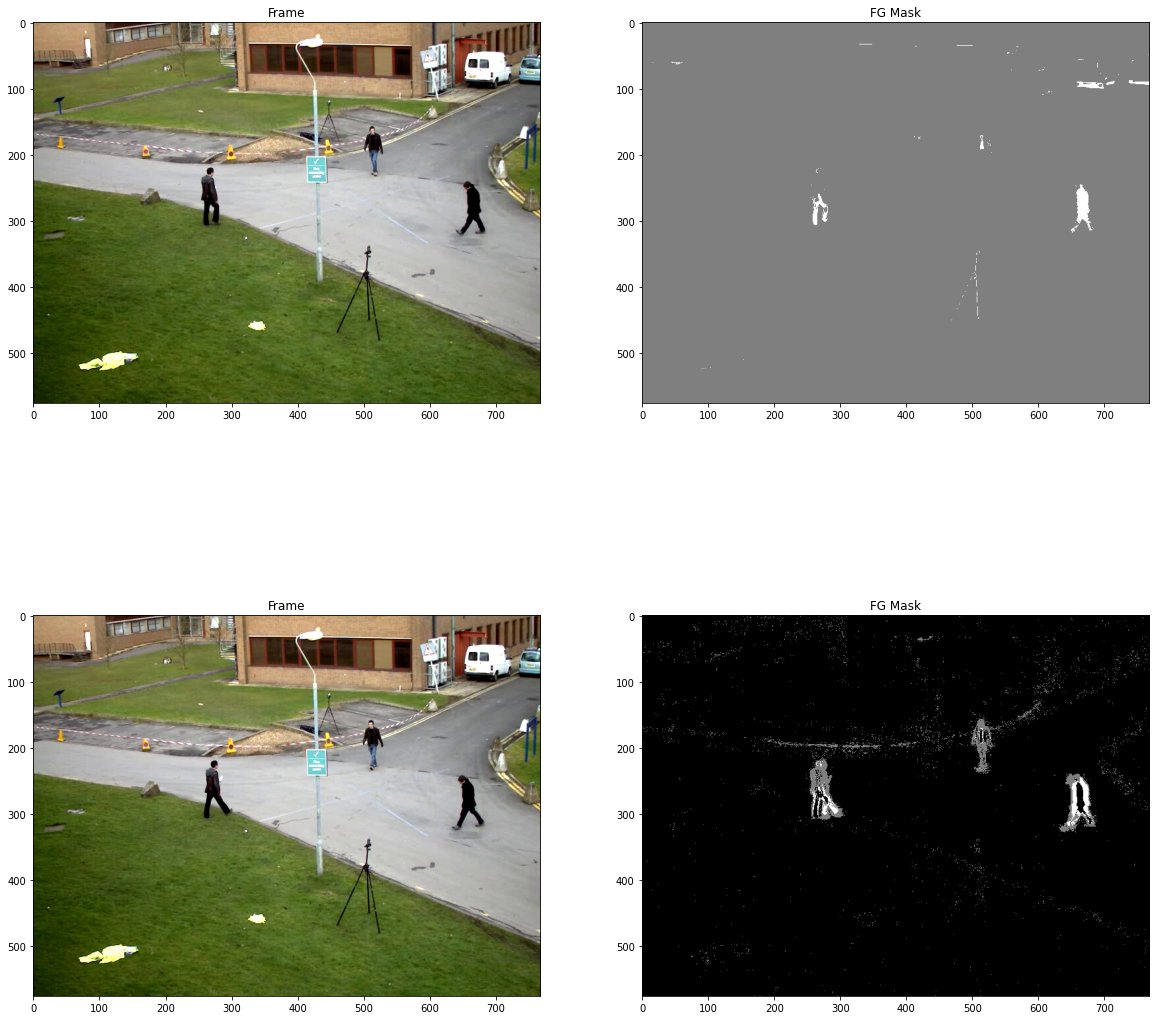

In [64]:
import cv2 
import matplotlib.pyplot as plt

algo = 'MOG2'

if algo == 'MOG2':
    backSub = cv2.createBackgroundSubtractorMOG2()
else:
    backSub = cv2.createBackgroundSubtractorKNN()

plt.figure(figsize=(20, 20))

frame = cv2.imread('./data/Background_Subtraction_Tutorial_frame.png')
fgMask = backSub.apply(frame)

plt.subplot(2, 2, 1)
plt.title("Frame")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 2)
plt.title("FG Mask")
plt.imshow(cv2.cvtColor(fgMask, cv2.COLOR_BGR2RGB))
                       
frame = cv2.imread('./data/Background_Subtraction_Tutorial_frame_1.png')
fgMask = backSub.apply(frame)

plt.subplot(2, 2, 3)
plt.title("Frame")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 4)
plt.title("FG Mask")
plt.imshow(cv2.cvtColor(fgMask, cv2.COLOR_BGR2RGB))

# 18.Funny Mirrors Using OpenCV

In [ ]:
# 추가 자료 필요

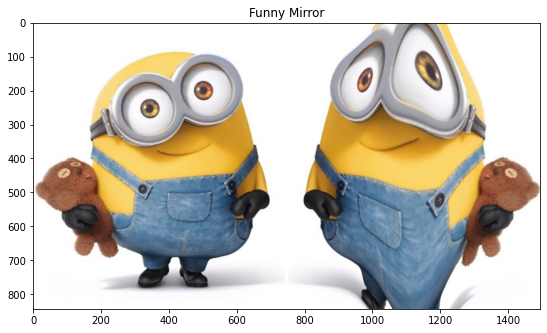

In [7]:
import cv2
import numpy as np
import math
from vcam import vcam,meshGen
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

# Reading the input image. Pass the path of image you would like to use as input image.
img = cv2.imread("./data/minions.jpeg")
H,W = img.shape[:2]

# Creating the virtual camera object
c1 = vcam(H=H,W=W)

# Creating the surface object
plane = meshGen(H,W)

# We generate a mirror where for each 3D point, its Z coordinate is defined as Z = 20*exp^((x/w)^2 / 2*0.1*sqrt(2*pi))

plane.Z += 20*np.exp(-0.5*((plane.X*1.0/plane.W)/0.1)**2)/(0.1*np.sqrt(2*np.pi))
pts3d = plane.getPlane()

pts2d = c1.project(pts3d)
map_x,map_y = c1.getMaps(pts2d)

output = cv2.remap(img,map_x,map_y,interpolation=cv2.INTER_LINEAR)

plt.subplot(1, 2,1)
plt.title("Funny Mirror")
plt.imshow(cv2.cvtColor(np.hstack((img,output)), cv2.COLOR_BGR2RGB))

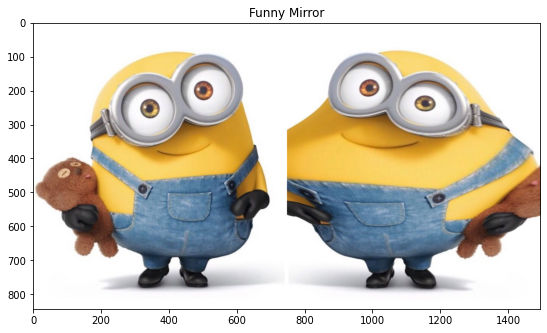

In [8]:
plt.figure(figsize=(20, 20))

# Reading the input image. Pass the path of image you would like to use as input image.
img = cv2.imread("./data/minions.jpeg")
H,W = img.shape[:2]

# Creating the virtual camera object
c1 = vcam(H=H,W=W)

# Creating the surface object
plane = meshGen(H,W)

# We generate a mirror where for each 3D point, its Z coordinate is defined as Z = 20*exp^((y/h)^2 / 2*0.1*sqrt(2*pi))
plane.Z += 20*np.exp(-0.5*((plane.Y*1.0/plane.H)/0.1)**2)/(0.1*np.sqrt(2*np.pi))

pts3d = plane.getPlane()

pts2d = c1.project(pts3d)
map_x,map_y = c1.getMaps(pts2d)

output = cv2.remap(img,map_x,map_y,interpolation=cv2.INTER_LINEAR)

plt.subplot(1, 2,1)
plt.title("Funny Mirror")
plt.imshow(cv2.cvtColor(np.hstack((img,output)), cv2.COLOR_BGR2RGB))

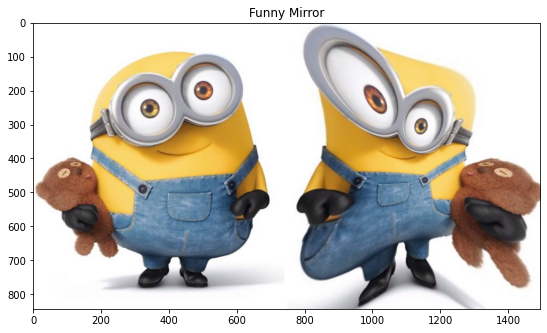

In [9]:
plt.figure(figsize=(20, 20))

# Reading the input image. Pass the path of image you would like to use as input image.
img = cv2.imread("./data/minions.jpeg")
H,W = img.shape[:2]

# Creating the virtual camera object
c1 = vcam(H=H,W=W)

# Creating the surface object
plane = meshGen(H,W)

# We generate a mirror where for each 3D point, its Z coordinate is defined as Z = 20*[ sin(2*pi*(x/w-1/4))) + sin(2*pi*(y/h-1/4))) ]

plane.Z += 20*np.sin(2*np.pi*((plane.X-plane.W/4.0)/plane.W)) + 20*np.sin(2*np.pi*((plane.Y-plane.H/4.0)/plane.H))

pts3d = plane.getPlane()

pts2d = c1.project(pts3d)
map_x,map_y = c1.getMaps(pts2d)

output = cv2.remap(img,map_x,map_y,interpolation=cv2.INTER_LINEAR)

plt.subplot(1, 2,1)
plt.title("Funny Mirror")
plt.imshow(cv2.cvtColor(np.hstack((img,output)), cv2.COLOR_BGR2RGB))

# 2022 07 25일 버전 
# 2주치 자료로 다시 만들기 

In [10]:
# https://www.kaggle.com/code/bulentsiyah/learn-opencv-by-examples-with-python